Question 1: Data Preprocessing (Medium)
* a. Load the MNIST handwritten digit dataset and perform the following
pre-processing steps:
* b. Normalize the pixel values of the images.
* c. Apply one-hot encoding to the target labels.
* d. Split the data into training, validation, and test sets.
* e. Dataset: https://github.com/iamavieira/handwritten-digits-mnist

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 1. Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# 2. Normalize pixel values
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# 3. One-hot encode labels
y_train_full_oh = to_categorical(y_train_full, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

# 4. Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full_oh, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test_oh.shape)


Training set: (48000, 28, 28) (48000, 10)
Validation set: (12000, 28, 28) (12000, 10)
Test set: (10000, 28, 28) (10000, 10)


Question 2: Classification (Hard)
* a. Build a logistic regression model to classify handwritten digits from the MNIST
dataset.
* b. Evaluate the model performance using accuracy, precision, recall, and F1 score.
* c. Fine-tune the model hyperparameters using grid search CV to improve
performance.
* d. Visualize the decision boundary of the model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# TRAINING MODEL
# Reshape images to 2D arrays
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Convert one-hot labels back to class labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test_oh, axis=1)

# Build logistic regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial')

# Train model
model.fit(X_train_scaled, y_train_labels)

# MODEL EVALUATION
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='macro')
recall = recall_score(y_test_labels, y_pred, average='macro')
f1 = f1_score(y_test_labels, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9167
Precision: 0.9157266682623268
Recall: 0.9154557642891898
F1 Score: 0.9154924750123742


In [ ]:
# HYPERPARAMETER TUNING

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000, multi_class='multinomial'),
    param_grid,
    cv=3,
    scoring='accuracy'
)

grid.fit(X_train_scaled, y_train_labels)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Best Parameters: {'C': 0.01}
Best Accuracy: 0.9192708333333334


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


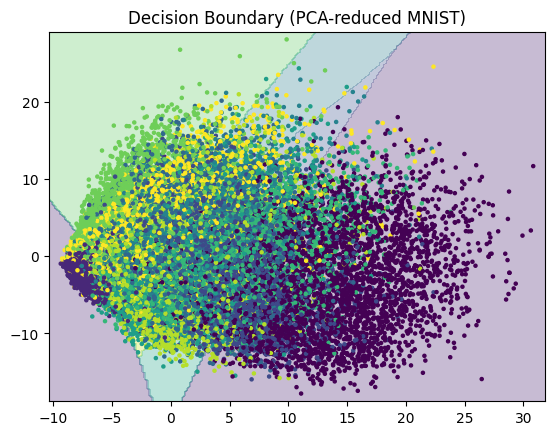

In [ ]:
# VISUALIZATION

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Train model on reduced data
model_2d = LogisticRegression(multi_class='multinomial', max_iter=1000)
model_2d.fit(X_pca, y_train_labels)

# Create mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_labels, s=5)
plt.title("Decision Boundary (PCA-reduced MNIST)")
plt.show()

Question 3: Clustering (Medium)

* a. Apply K-means clustering to group customers based on their purchase history
and demographic information.
* b. Determine the optimal number of clusters using the elbow method.
* c. Analyze the characteristics of each cluster to identify customer segments.
* d. Visualize the clusters using scatter plots and dimensionality reduction
techniques.
* e. Dataset: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

https://github.com/cwentz12/Supermarket-Sales-Analysis/blob/main/Data/supermarket_sales%20-%20Sheet1.csv


In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

In [5]:
df = pd.read_csv('supermarket sales.csv')

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
print("Dataset Shape:", df.shape)
df.info()
df.isnull().sum()

Dataset Shape: (1000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14 

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [7]:
df['Customer_ID'] = df['Gender'] + "_" + df['City'] + "_" + df['Customer type']

customer_df = df.groupby('Customer_ID').agg({
    'Total': ['sum', 'mean'],
    'Quantity': 'sum',
    'Rating': 'mean',
    'Gender': 'first',
    'City': 'first',
    'Customer type': 'first'
})

customer_df.columns = [
    'Total_Spend',
    'Avg_Spend',
    'Total_Quantity',
    'Avg_Rating',
    'Gender',
    'City',
    'Customer_Type'
]

customer_df.reset_index(inplace=True)

customer_df.head()

,Customer_ID,Total_Spend,Avg_Spend,Total_Quantity,Avg_Rating,Gender,City,Customer_Type
0,Female_Mandalay_Member,26850.4320,315.887435,479,6.885882,Female,Mandalay,Member
1,Female_Mandalay_Normal,26077.8630,338.673545,432,6.866234,Female,Mandalay,Normal
2,Female_Naypyitaw_Member,34653.4440,360.973375,548,7.117708,Female,Naypyitaw,Member
3,Female_Naypyitaw_Normal,27032.0190,329.658768,501,7.204878,Female,Naypyitaw,Normal
4,Female_Yangon_Member,26643.0675,333.038344,465,6.786250,Female,Yangon,Member


In [11]:
cluster_df = customer_df.copy()

le = LabelEncoder()

cluster_df['Gender'] = le.fit_transform(cluster_df['Gender'])
cluster_df['City'] = le.fit_transform(cluster_df['City'])
cluster_df['Customer_Type'] = le.fit_transform(cluster_df['Customer_Type'])

cluster_df.head()

,Customer_ID,Total_Spend,Avg_Spend,Total_Quantity,Avg_Rating,Gender,City,Customer_Type
0,Female_Mandalay_Member,26850.4320,315.887435,479,6.885882,0,0,0
1,Female_Mandalay_Normal,26077.8630,338.673545,432,6.866234,0,0,1
2,Female_Naypyitaw_Member,34653.4440,360.973375,548,7.117708,0,1,0
3,Female_Naypyitaw_Normal,27032.0190,329.658768,501,7.204878,0,1,1
4,Female_Yangon_Member,26643.0675,333.038344,465,6.786250,0,2,0


In [12]:
features = [
    'Total_Spend',
    'Avg_Spend',
    'Total_Quantity',
    'Avg_Rating',
    'Gender',
    'City',
    'Customer_Type'
]

X = cluster_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


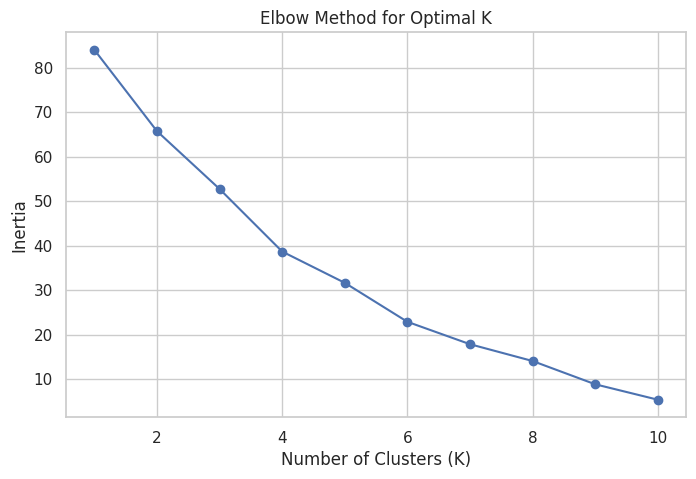

In [13]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)

cluster_df['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_df.head()

,Customer_ID,Total_Spend,Avg_Spend,Total_Quantity,Avg_Rating,Gender,City,Customer_Type,Cluster
0,Female_Mandalay_Member,26850.4320,315.887435,479,6.885882,0,0,0,0
1,Female_Mandalay_Normal,26077.8630,338.673545,432,6.866234,0,0,1,1
2,Female_Naypyitaw_Member,34653.4440,360.973375,548,7.117708,0,1,0,2
3,Female_Naypyitaw_Normal,27032.0190,329.658768,501,7.204878,0,1,1,0
4,Female_Yangon_Member,26643.0675,333.038344,465,6.786250,0,2,0,0


In [17]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_df['Cluster']

pca_df.head()

,PC1,PC2,Cluster
0,0.496390,-1.185352,0
1,-0.006586,-1.363883,1
2,4.094817,0.135633,2
3,1.108110,1.110291,0
4,0.632763,-0.545307,0


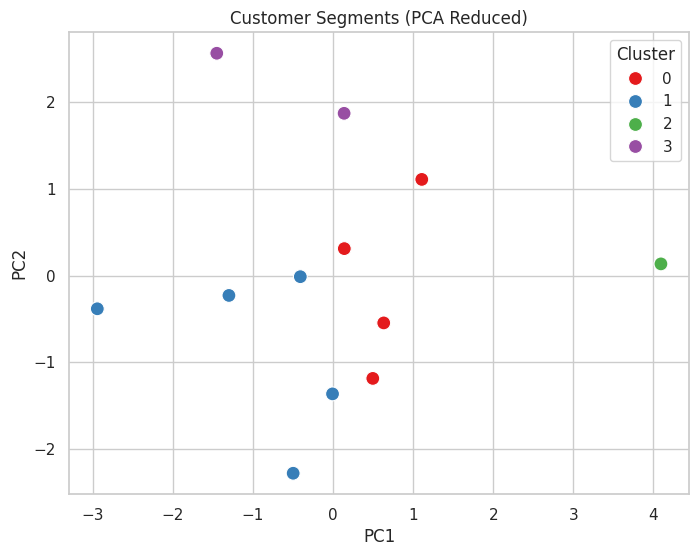

In [18]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set1',
    data=pca_df,
    s=100
)

plt.title("Customer Segments (PCA Reduced)")
plt.show()